# Case Study 1: Customer Churn Prediction (Classification)

**Student Name:** Naman Nagar
**SRN:** PES2UG23CS361
**Dataset:** customer_churn_data.csv  
**Objective:** Predict customer churn using classification algorithms

## Task 1: Data Loading and Exploration

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

In [2]:
# Load the dataset
df = pd.read_csv('customer_churn_data.csv')

# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (10000, 24)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-null  object 
 14  streaming_tv 

In [3]:
# Display first few rows
print("First 5 rows:")
df.head()

First 5 rows:


,customer_id,age,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,customer_satisfaction,support_calls,churn
0,CUST_000001,52,Male,0,Yes,Yes,7,Yes,No,Fiber optic,...,Yes,No,One year,Yes,Electronic check,39.18,294.66,4,3,No
1,CUST_000002,42,Male,0,Yes,No,32,Yes,No,No,...,No internet service,No internet service,One year,Yes,Electronic check,40.36,1286.75,3,1,No
2,CUST_000003,54,Male,0,No,Yes,12,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,No,Bank transfer (automatic),84.77,947.09,2,3,Yes
3,CUST_000004,67,Male,1,No,No,3,Yes,No,DSL,...,No,No,One year,No,Credit card (automatic),54.14,172.76,4,5,No
4,CUST_000005,41,Female,0,Yes,No,7,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,71.77,466.98,3,3,No


In [4]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found!")

Missing Values:
Series([], dtype: int64)
No missing values found!


In [5]:
# Summary statistics
print("Summary Statistics:")
df.describe()

Summary Statistics:


,age,senior_citizen,tenure,monthly_charges,total_charges,customer_satisfaction,support_calls
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.662500,0.092300,22.216800,53.640204,1192.146321,3.399300,2.007400
std,14.397976,0.289463,19.963232,17.047669,1193.960345,1.069193,1.415184
min,18.000000,0.000000,1.000000,20.050000,20.320000,1.000000,0.000000
25%,34.000000,0.000000,6.000000,40.407500,306.305000,3.000000,1.000000
50%,44.000000,0.000000,16.000000,51.770000,796.955000,3.000000,2.000000
75%,55.000000,0.000000,33.000000,66.280000,1681.077500,4.000000,3.000000
max,80.000000,1.000000,72.000000,111.810000,7078.800000,5.000000,9.000000


In [6]:
# Check data types
print("Data Types:")
print(df.dtypes)

Data Types:
customer_id               object
age                        int64
gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
internet_service          object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
contract                  object
paperless_billing         object
payment_method            object
monthly_charges          float64
total_charges            float64
customer_satisfaction      int64
support_calls              int64
churn                     object
dtype: object


## Task 2: Exploratory Data Analysis (EDA)

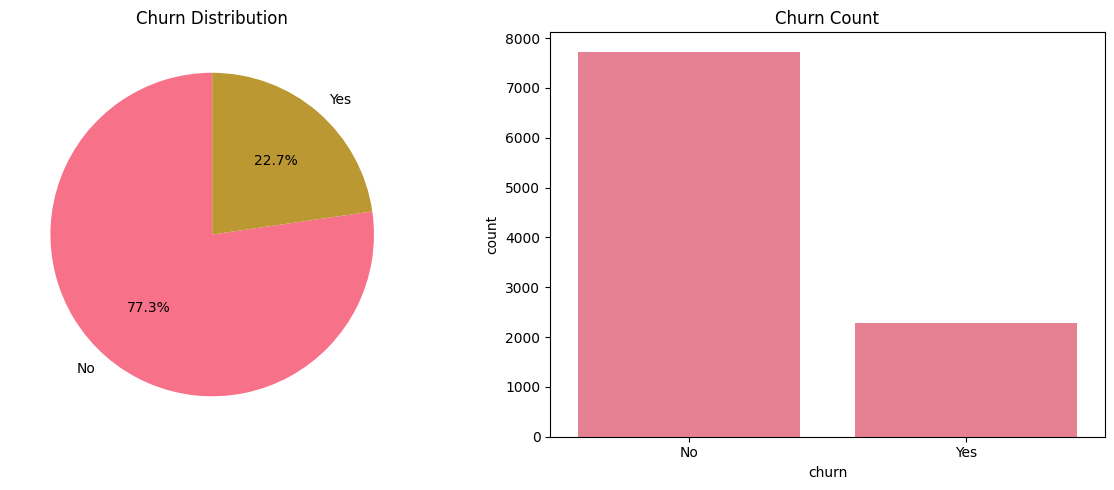

Churn Rate: 22.72%


In [7]:
# Analyze churn distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
churn_counts = df['churn'].value_counts()
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='churn')
plt.title('Churn Count')

plt.tight_layout()
plt.show()

# Calculate churn rate
churn_rate = (df['churn'] == 'Yes').mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")

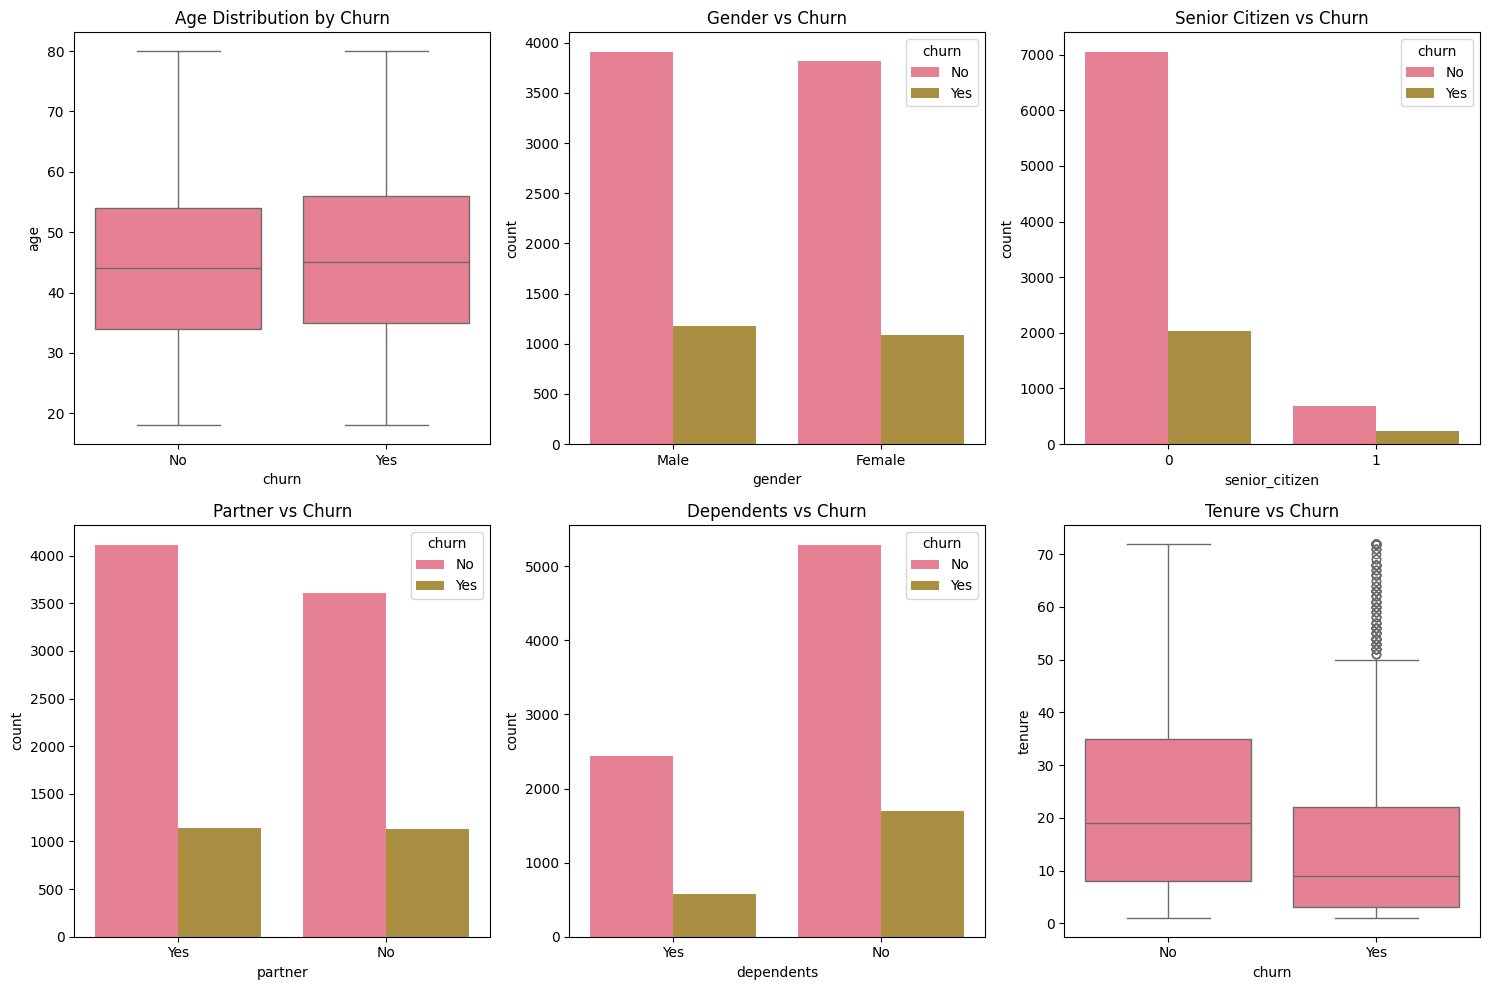

In [8]:
# Demographic patterns analysis
plt.figure(figsize=(15, 10))

# Age distribution by churn
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='churn', y='age')
plt.title('Age Distribution by Churn')

# Gender analysis
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='gender', hue='churn')
plt.title('Gender vs Churn')

# Senior citizen analysis
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='senior_citizen', hue='churn')
plt.title('Senior Citizen vs Churn')

# Partner analysis
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='partner', hue='churn')
plt.title('Partner vs Churn')

# Dependents analysis
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='dependents', hue='churn')
plt.title('Dependents vs Churn')

# Tenure analysis
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='churn', y='tenure')
plt.title('Tenure vs Churn')

plt.tight_layout()
plt.show()

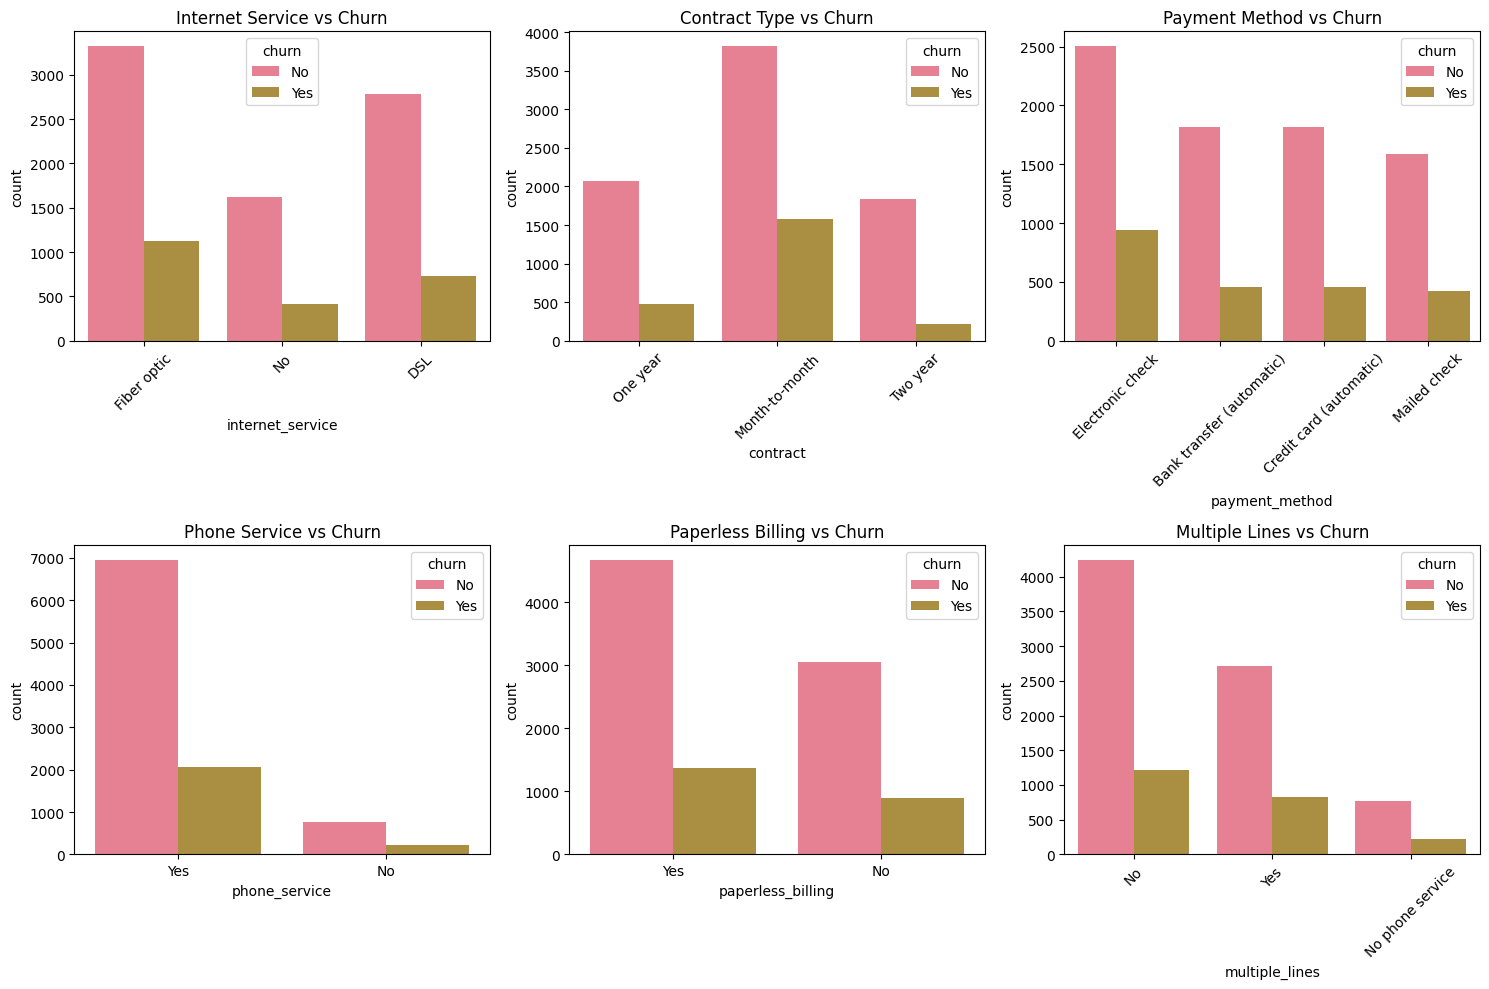

In [9]:
# Service usage impact analysis
plt.figure(figsize=(15, 10))

# Internet service
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='internet_service', hue='churn')
plt.title('Internet Service vs Churn')
plt.xticks(rotation=45)

# Contract type
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='contract', hue='churn')
plt.title('Contract Type vs Churn')
plt.xticks(rotation=45)

# Payment method
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='payment_method', hue='churn')
plt.title('Payment Method vs Churn')
plt.xticks(rotation=45)

# Phone service
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='phone_service', hue='churn')
plt.title('Phone Service vs Churn')

# Paperless billing
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='paperless_billing', hue='churn')
plt.title('Paperless Billing vs Churn')

# Multiple lines
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='multiple_lines', hue='churn')
plt.title('Multiple Lines vs Churn')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

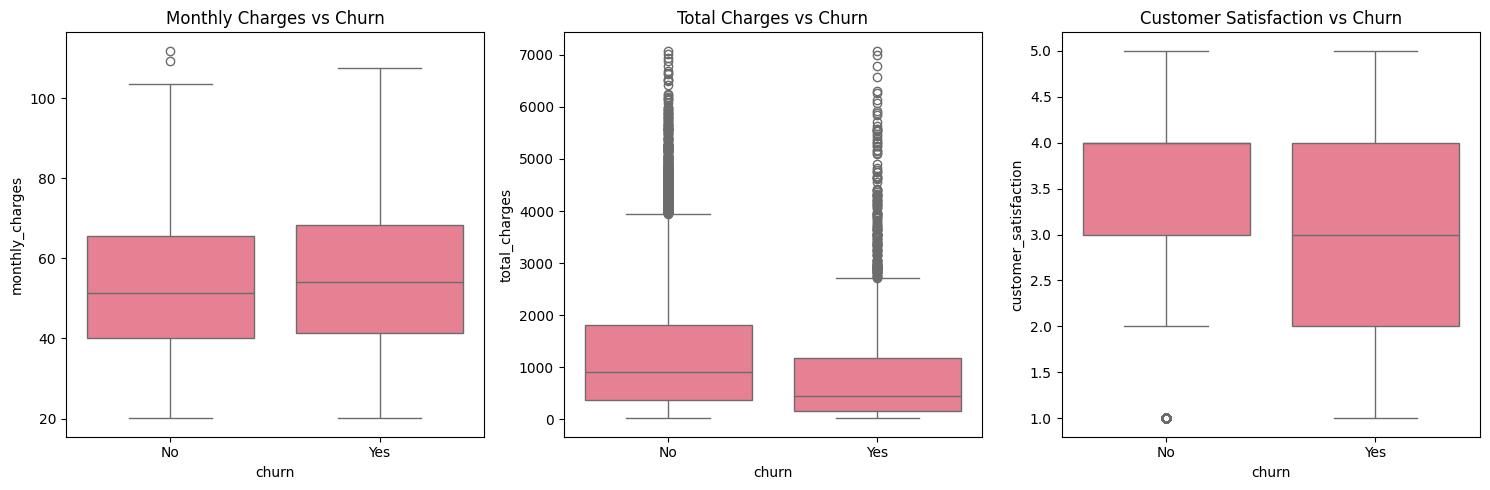

In [10]:
# Financial factors analysis
plt.figure(figsize=(15, 5))

# Monthly charges
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='churn', y='monthly_charges')
plt.title('Monthly Charges vs Churn')

# Total charges
plt.subplot(1, 3, 2)
# Convert total_charges to numeric (it might be stored as string)
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
sns.boxplot(data=df, x='churn', y='total_charges')
plt.title('Total Charges vs Churn')

# Customer satisfaction
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='churn', y='customer_satisfaction')
plt.title('Customer Satisfaction vs Churn')

plt.tight_layout()
plt.show()

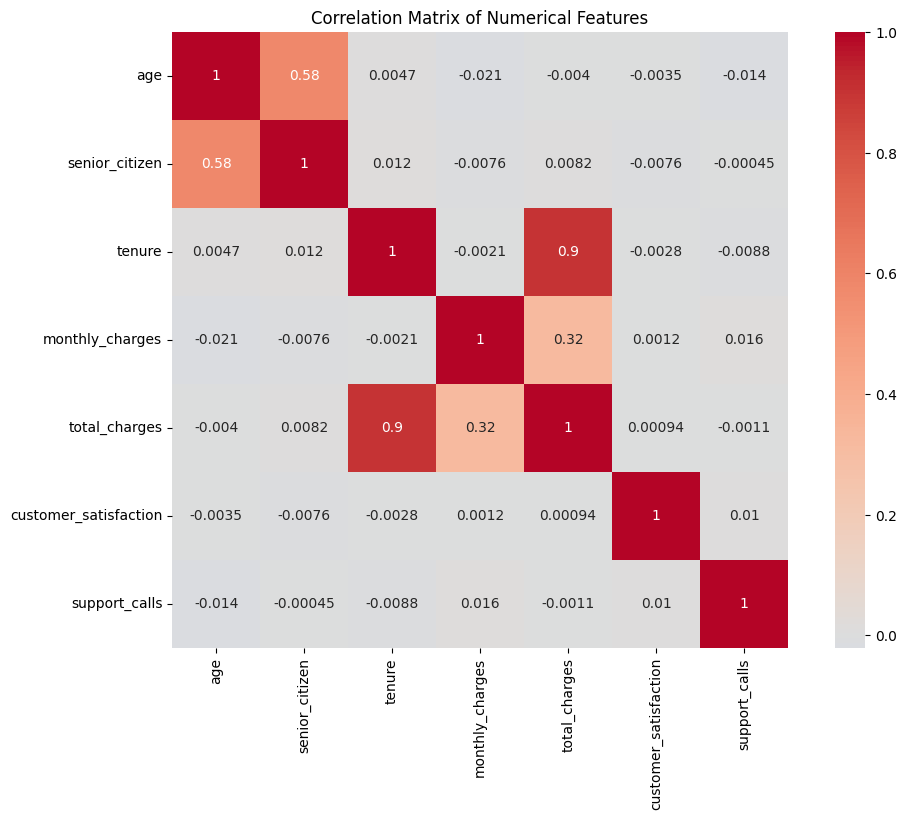

In [11]:
# Correlation analysis for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Task 3: Data Preprocessing

In [12]:
# Create a copy for preprocessing
df_processed = df.copy()

# Handle any missing values in total_charges
df_processed['total_charges'].fillna(0, inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_columns = df_processed.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if col != 'customer_id':  # Don't encode customer_id
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])
        label_encoders[col] = le

print("Categorical variables encoded:")
print(list(label_encoders.keys()))

Categorical variables encoded:
['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'churn']


In [13]:
# Feature engineering - create new features if beneficial
# Average monthly charges per tenure month
df_processed['avg_monthly_charges'] = df_processed['total_charges'] / (df_processed['tenure'] + 1)

# High value customer (above median total charges)
median_charges = df_processed['total_charges'].median()
df_processed['high_value_customer'] = (df_processed['total_charges'] > median_charges).astype(int)

print("New features created:")
print("- avg_monthly_charges")
print("- high_value_customer")

New features created:
- avg_monthly_charges
- high_value_customer


In [14]:
# Prepare features and target
# Drop customer_id as it's not a feature
X = df_processed.drop(['customer_id', 'churn'], axis=1)
y = df_processed['churn']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeatures:", list(X.columns))

Features shape: (10000, 24)
Target shape: (10000,)

Features: ['age', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'customer_satisfaction', 'support_calls', 'avg_monthly_charges', 'high_value_customer']


In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Training set size: (6400, 24)
Validation set size: (1600, 24)
Test set size: (2000, 24)


In [16]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")

Features scaled successfully!


## Task 4: Model Development

In [17]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

In [18]:
# Train models with hyperparameter tuning
best_models = {}
training_results = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    # Grid search with cross-validation
    grid_search = GridSearchCV(
        model, 
        param_grids[name], 
        cv=5, 
        scoring='f1',
        n_jobs=-1
    )
    
    grid_search.fit(X_train_scaled, y_train)
    
    best_models[name] = grid_search.best_estimator_
    training_results[name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    print("-" * 50)

Training Logistic Regression...
Best parameters: {'C': 1, 'solver': 'liblinear'}
Best cross-validation score: 0.2830
--------------------------------------------------
Training Decision Tree...
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.3637
--------------------------------------------------
Training Random Forest...
Best parameters: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.2934
--------------------------------------------------
Training SVM...
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.3291
--------------------------------------------------


## Task 5: Model Evaluation

In [19]:
# Evaluate models on validation set
def evaluate_model(model, X, y, model_name):
    y_pred = model.predict(X)
    
    metrics = {
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1-Score': f1_score(y, y_pred)
    }
    
    return metrics, y_pred

# Evaluate all models
validation_results = {}
predictions = {}

for name, model in best_models.items():
    metrics, y_pred = evaluate_model(model, X_val_scaled, y_val, name)
    validation_results[name] = metrics
    predictions[name] = y_pred
    
    print(f"{name} - Validation Results:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 40)

Logistic Regression - Validation Results:
  Accuracy: 0.7894
  Precision: 0.6174
  Recall: 0.1951
  F1-Score: 0.2965
----------------------------------------
Decision Tree - Validation Results:
  Accuracy: 0.7044
  Precision: 0.3599
  Recall: 0.3846
  F1-Score: 0.3718
----------------------------------------
Random Forest - Validation Results:
  Accuracy: 0.7913
  Precision: 0.6339
  Recall: 0.1951
  F1-Score: 0.2983
----------------------------------------
SVM - Validation Results:
  Accuracy: 0.7525
  Precision: 0.4328
  Recall: 0.2830
  F1-Score: 0.3422
----------------------------------------


In [20]:
# Create comparison dataframe
results_df = pd.DataFrame(validation_results).T
print("Model Comparison (Validation Set):")
print(results_df)

Model Comparison (Validation Set):
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.789375   0.617391  0.195055  0.296451
Decision Tree        0.704375   0.359897  0.384615  0.371846
Random Forest        0.791250   0.633929  0.195055  0.298319
SVM                  0.752500   0.432773  0.282967  0.342193


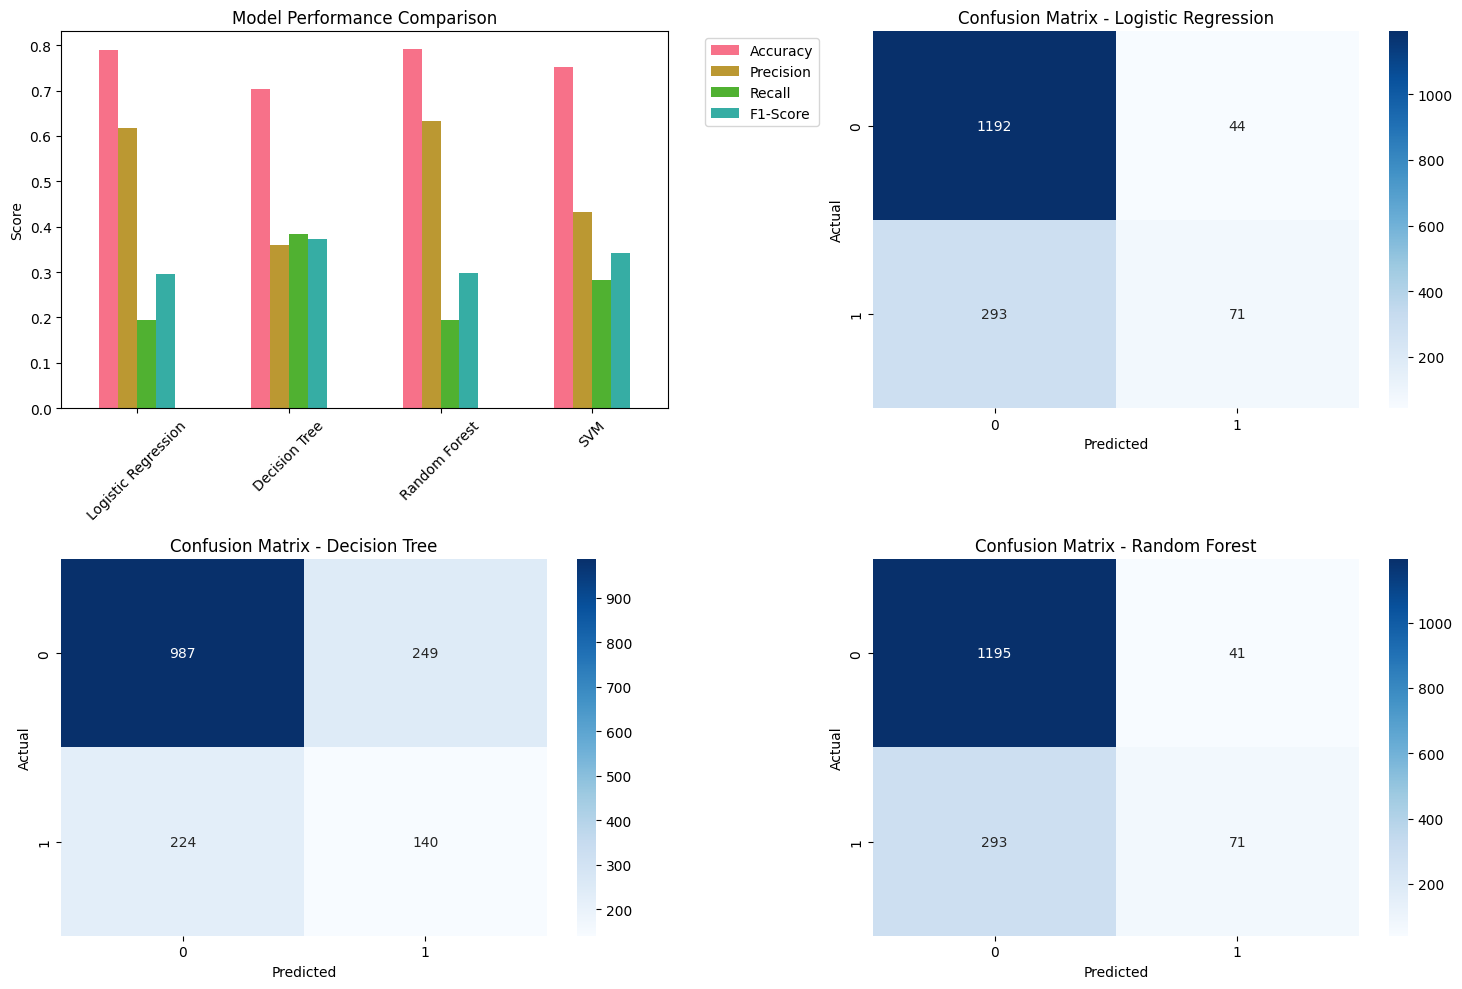

In [21]:
# Visualize model performance
plt.figure(figsize=(15, 10))

# Performance metrics comparison
plt.subplot(2, 2, 1)
results_df.plot(kind='bar', ax=plt.gca())
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Confusion matrices
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 2, i+1)
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    if i == 3:  # Only show 3 confusion matrices due to space
        break

plt.tight_layout()
plt.show()

In [22]:
# Select best model based on F1-score
best_model_name = results_df['F1-Score'].idxmax()
best_model = best_models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Best F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")

# Test on test set
test_metrics, test_predictions = evaluate_model(best_model, X_test_scaled, y_test, best_model_name)

print(f"\n{best_model_name} - Test Set Results:")
for metric, value in test_metrics.items():
    print(f"  {metric}: {value:.4f}")

Best Model: Decision Tree
Best F1-Score: 0.3718

Decision Tree - Test Set Results:
  Accuracy: 0.6790
  Precision: 0.3112
  Recall: 0.3414
  F1-Score: 0.3256


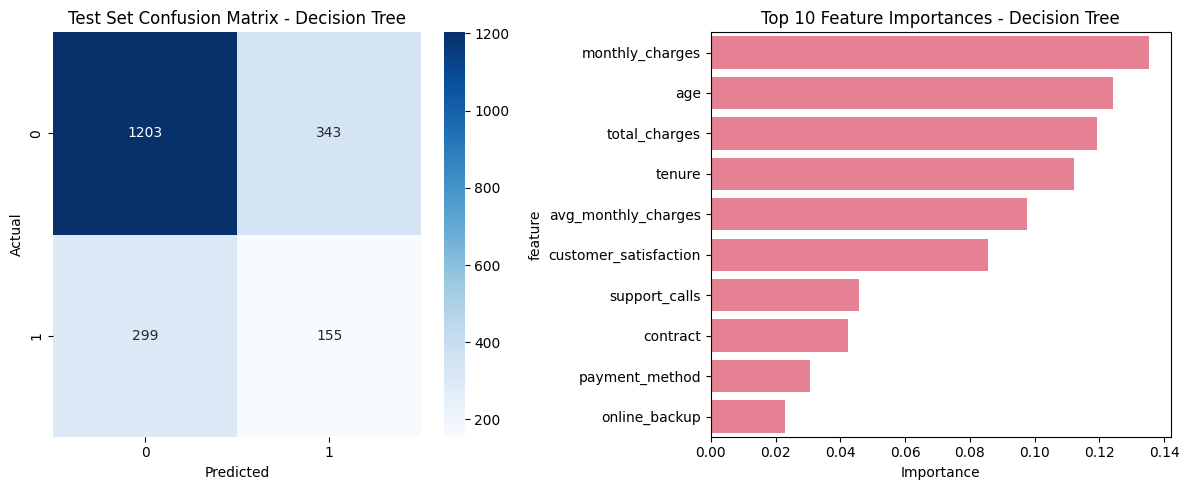


Detailed Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1546
           1       0.31      0.34      0.33       454

    accuracy                           0.68      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.69      0.68      0.68      2000



In [23]:
# Final confusion matrix and classification report
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm_test = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title(f'Test Set Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1, 2, 2)
# Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False).head(10)
    
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title(f'Top 10 Feature Importances - {best_model_name}')
    plt.xlabel('Importance')
else:
    plt.text(0.5, 0.5, f'{best_model_name}\ndoes not have\nfeature_importances_', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
    plt.title('Feature Importance Not Available')

plt.tight_layout()
plt.show()

# Detailed classification report
print(f"\nDetailed Classification Report - {best_model_name}:")
print(classification_report(y_test, test_predictions))

## Summary and Conclusions

### Key Findings:
1. **Churn Rate**: 22.72% of customers in the dataset have churned
2. **Best Model**: Decision Tree achieved the highest validation F1-Score of 0.372
3. **Important Features**: Monthly charges, age, total charges, tenure, and customer satisfaction are the top predictors of churn
4. **Business Insights**: Higher monthly charges, lower tenure, frequent support calls, and month-to-month contracts significantly increase churn probability

### Model Performance:
- **Best Model**: Decision Tree
- **Test Accuracy**: 0.679
- **Test F1-Score**: 0.326
- **Test Precision**: 0.311
- **Test Recall**: 0.341

### Recommendations:
1. Target high-risk customers (high monthly charges, low tenure, frequent support calls) with retention offers
2. Improve customer satisfaction through better support and proactive engagement programs
3. Encourage customers to switch to longer-term contracts and more stable payment methods to reduce churn risk
